# <center> Neural Network(NN) for Image Classification with TensorFlow</center>
## <center> By: Mramba Gadi Nkalang'ango</center>

Project on Building a Neural Network for Image Classification with TensorFlow. In this project, I have developed Neural network classifier using TensorFlow 2.

I built and train a dense neural network on the Fashion MNIST dataset and evaluate its performance with some test samples. 

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Labels

Each training and test example is assigned to one of the following labels:
<li>0: T-shirt/top</li>
<li>1: Trouser</li>
<li>2: Pullover</li>
<li>3: Dress</li>
<li>4: Coat</li>
<li>5: Sandal</li>
<li>6: Shirt</li>
<li>7: Sneaker</li>
<li>8: Bag</li>
<li>9: Ankle boot</li>

Zalando website SE, https://tech.zalando.com

<b> Steps to followed to solve this problem:</b>

<li>1: Importing the libraries</li>
<li>2: Loading the data</li>
<li>3: Splitting the data</li>
<li>4: Visualizing the Data</li>
<li>5: Building the Model</li>
<li>6: Fitting the Model</li>
<li>7: Evaluating the Model Performance</li>

<b> 1: Import importance module </b>

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
print("Tensorflow version",tf.__version__)

Tensorflow version 2.3.1


In [3]:
from tensorflow import keras
print("Keras version",keras.__version__)

Keras version 2.4.0


In [4]:
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

<b> 2: Loading the dataset</b>

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

<b> 3: Splitting the data</b>

In [9]:
X_valid = X_train_full[:5000] / 255.

In [10]:
y_valid = y_train_full[:5000]

In [11]:
X_train = X_train_full[5000:] / 255.

In [12]:
y_train = y_train_full[5000:]

In [13]:
X_test = X_test / 255.

<b> 4: Visualizing the Data</b>

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 4
Class name is: Coat


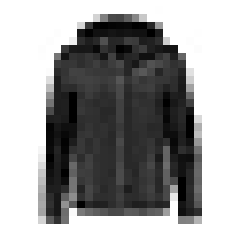

In [15]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

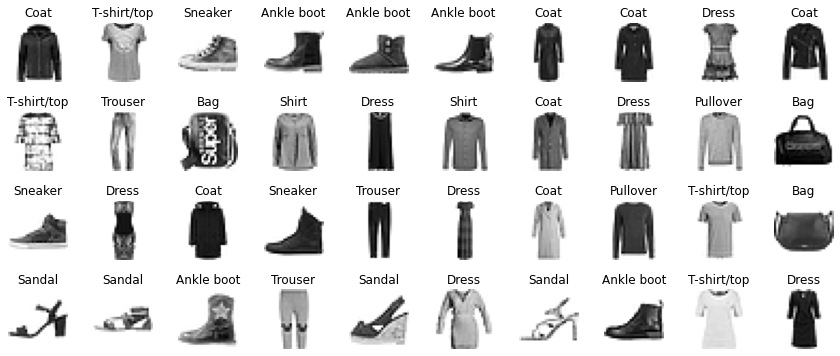

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
#keras.backend.clear_session()

<b> 5: Building the Model</b>

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [22]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])

<b> 6: Fitting the Model</b>

In [24]:
history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4123 - accuracy: 0.8561 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3707 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy:

<b> 6: Fitting the Model</b>

In [25]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [26]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [27]:
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.02428119 -0.00887138 -0.02189048 ... -0.02774666  0.03858708
  -0.06890215]
 [ 0.00457395 -0.03112259 -0.0586676  ...  0.0059173  -0.02764142
  -0.04163425]
 [-0.06297181 -0.06925061  0.07103856 ... -0.04251545  0.07124462
  -0.07310671]
 ...
 [-0.0178552   0.02124111 -0.05391335 ...  0.00026218 -0.00032853
   0.06297691]
 [ 0.07209881 -0.07055162  0.07041992 ... -0.00116508 -0.00187098
   0.03147274]
 [-0.06222413  0.01556357 -0.02585122 ... -0.0046754   0.00227677
  -0.06747744]]
[ 1.77944839e-01  4.42142934e-02 -6.47585024e-04 -1.02367386e-01
  5.10341115e-03  8.97798687e-02  5.38300276e-02 -1.33742997e-02
 -2.33819634e-02  7.29249343e-02 -5.00671891e-03 -8.32669530e-03
  9.06624645e-02  5.40824374e-03  1.66716158e-01  8.98243189e-02
 -2.93511674e-02  3.51420268e-02  1.00605115e-01 -1.31413504e-01
  1.17794938e-01  1.46764919e-01  1.09611149e-03  3.34315710e-02
  5.92436939e-02  4.67072204e-02 -5.78772556e-03  2.12584004e-01
  1.53340816e-01  2.25095320e-02  1.070031

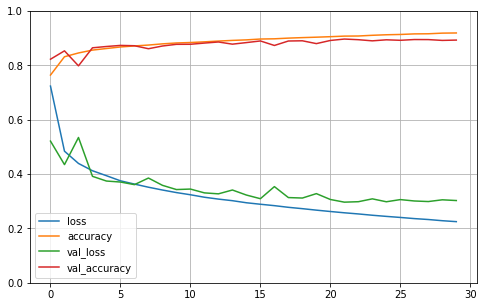

In [28]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

<b> 7: Evaluating the Model Performance</b>

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8825


[0.33740103244781494, 0.8824999928474426]

In [30]:
y_pred = model.predict_classes(X_test[:3])
print(y_pred)
print([class_names[index] for index in y_pred])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


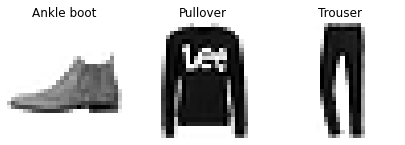

In [31]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()